# Sentiment Analysis of IMDB Movie Reviews

**Import necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords, wordnet
from nltk import pos_tag
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
from collections import Counter
from sklearn.model_selection import train_test_split
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


In [2]:
data = pd.read_csv("IMDB Dataset.csv")
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
print(f"data shape: {data.shape}")

data shape: (50000, 2)


In [4]:
# Summary
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


Check for null values

In [6]:
data.isnull().sum()

review       0
sentiment    0
dtype: int64

### Sentiment count and visualization

In [7]:
data['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

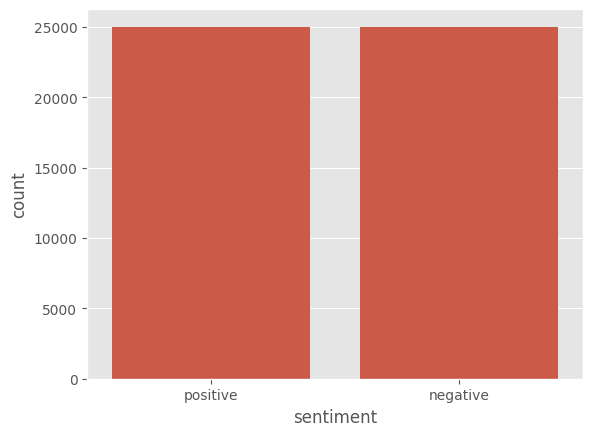

In [8]:
plt.style.use('ggplot')
sns.countplot(data=data, x=data['sentiment'])
plt.show()

We can see that the class is balanced

In [9]:
example = data['review'][1]
example

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

## Text Preprocessing

In [10]:
# Tokenization of text
tokenizer = ToktokTokenizer()
# Setting English stopwords
stop_words = set(stopwords.words('english'))

# Lemmatization of text
lemmatizer = WordNetLemmatizer()
# porter = PorterStemmer()


In [11]:
def clean_text(text):
    # Convert to string and lowercase
    text = str(text).lower()

    # Remove the html strips
    soup = BeautifulSoup(text, 'html.parser')
    text = soup.get_text()
    
    # Removing square brackets
    text = re.sub('\[[^]]*\]', '', text)

    # Remove special characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    # Remove single character
    text = re.sub(r"\s+[a-zA-Z]\s+", ' ', text)

    # Remove multiple spaces
    text = re.sub(r'\s+', ' ', text)

    # Lemmatizing the text
    text = ' '.join(lemmatizer.lemmatize(word) for word in text.split())
    
    # Remove stopwords
    tokens = tokenizer.tokenize(text)

    tokens = [token.strip() for token in tokens]

    clean_tokens = [token for token in tokens if token not in stop_words]
    
    clean_text = ' '.join(clean_tokens)

    return clean_text


In [12]:
clean_text(example)

'wonderful little production filming technique unassuming oldtimebbc fashion give comforting sometimes discomforting sense realism entire piece actor extremely well chosen michael sheen ha got polari ha voice pat truly see seamless editing guided reference williams diary entry well worth watching terrificly written performed piece masterful production one great master comedy life realism really come home little thing fantasy guard rather use traditional dream technique remains solid disappears play knowledge sens particularly scene concerning orton halliwell set particularly flat halliwells mural decorating every surface terribly well done'

In [13]:
df = data.copy()

In [14]:
df['review'] = df['review'].apply(clean_text)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16672\3446454382.py:6: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'html.parser')


In [15]:
df['review'].head()

0    one reviewer ha mentioned watching 1 oz episod...
1    wonderful little production filming technique ...
2    thought wa wonderful way spend time hot summer...
3    basically family little boy jake think zombie ...
4    petter matteis love time money visually stunni...
Name: review, dtype: object

In [16]:
X = df['review']
y = df['sentiment']

In [17]:

X_sampled = X.sample(frac=0.5, random_state=42)  # 50% sample
y_sampled = y.loc[X_sampled.index] 

X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=42)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")


X_train shape: (20000,)
X_test shape: (5000,)


## Text Vectorization

First let us use the bag of words(boW) model

In [18]:
cv = CountVectorizer( binary=False, ngram_range=(1,3))
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

print(f"BOW_cv_train: {X_train_cv.shape}")
print(f"BOW_cv_test: {X_test_cv.shape}")

BOW_cv_train: (20000, 3843891)
BOW_cv_test: (5000, 3843891)


Term Frequency-Inverse Document Frequency model (TFIDF)

In [19]:
tv = TfidfVectorizer(use_idf=True, ngram_range=(1,3))
X_train_tv = tv.fit_transform(X_train)
X_test_tv = tv.transform(X_test)

print(f"Tfidf_train: {X_train_tv.shape}")
print(f"Tfidf_test: {X_test_tv.shape}")

Tfidf_train: (20000, 3843891)
Tfidf_test: (5000, 3843891)


Labeling the sentiment text

In [20]:
lb = LabelBinarizer()

y_train_labelled = lb.fit_transform(y_train)
y_test_labelled = lb.transform(y_test)
print(f"y_train_labelled: {y_train_labelled}")
print(f"y_test_labelled: {y_test_labelled}")

y_train_labelled: [[0]
 [0]
 [0]
 ...
 [1]
 [0]
 [0]]
y_test_labelled: [[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [0]]


## Build the models
We will be trying out a few models and compare which one performs the best.

**Logistic Regression**
Let us build logistic regression mofel for both bag of words and tfidf features.

In [21]:
# Train the model
lr = LogisticRegression(penalty='l2', max_iter=1000,C=1.0, random_state=42)

# Fit the model for Bag of words
lr_bow = lr.fit(X_train_cv, y_train_labelled)
print(lr_bow)

# Fit the model for tfidf features
lr_tfidf = lr.fit(X_train_tv, y_train_labelled)
print(lr_tfidf)



c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000, random_state=42)


c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000, random_state=42)


**Logistic regression model performance on the test dataset**

In [22]:
lr_bow_predict = lr_bow.predict(X_test_cv)
print(lr_bow_predict)
lr_tfidf_predict = lr_tfidf.predict(X_test_tv)
print(lr_tfidf_predict)

[1 1 1 ... 1 1 0]
[1 1 1 ... 1 1 1]


**Model Accuracy**

In [23]:
lr_bow_score = accuracy_score(y_test_labelled, lr_bow_predict)
print(f"lr_bow_score: {lr_bow_score}")
lr_tfidf_score = accuracy_score(y_test_labelled, lr_tfidf_predict)
print(f"lr_tfidf_score: {lr_tfidf_score}")

lr_bow_score: 0.8166
lr_tfidf_score: 0.8688


**Classification Report**

In [24]:
lr_bow_report = classification_report(y_test_labelled, lr_bow_predict, target_names=['Positive', "Negative"])
print(lr_bow_report)
lr_tfidf_report = classification_report(y_test_labelled, lr_tfidf_predict, target_names=['Positive', "negative"])
print(lr_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.77      0.90      0.83      2475
    Negative       0.88      0.74      0.80      2525

    accuracy                           0.82      5000
   macro avg       0.82      0.82      0.82      5000
weighted avg       0.83      0.82      0.82      5000

              precision    recall  f1-score   support

    Positive       0.87      0.86      0.87      2475
    negative       0.87      0.88      0.87      2525

    accuracy                           0.87      5000
   macro avg       0.87      0.87      0.87      5000
weighted avg       0.87      0.87      0.87      5000



**Confusion matrix**

[[1864  661]
 [ 256 2219]]


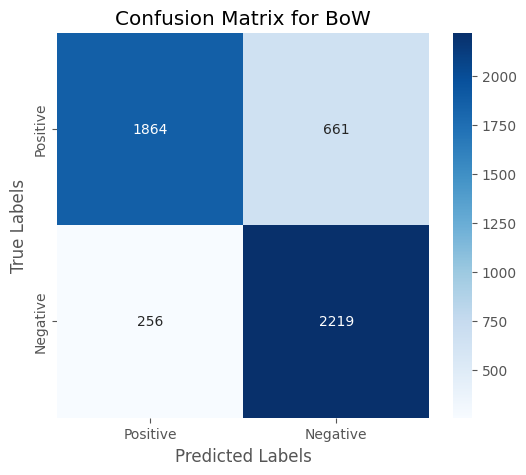

In [25]:
cm_bow_lr = confusion_matrix(y_test_labelled, lr_bow_predict, labels=[1,0])
print(cm_bow_lr)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_bow_lr, annot=True, fmt="d", cmap="Blues",  xticklabels=["Positive", "Negative"], 
            yticklabels=["Positive", "Negative"])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for BoW')
plt.show()


[[4519  520]
 [ 651 4310]]


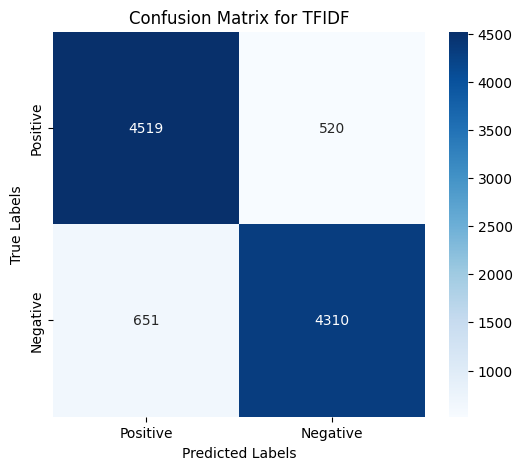

In [24]:
cm_tfidf_lr = confusion_matrix(y_test_labelled, lr_tfidf_predict, labels=[1,0])
print(cm_tfidf_lr)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_tfidf_lr, annot=True, fmt="d", cmap="Blues", xticklabels=["Positive", "Negative"], 
            yticklabels=["Positive", "Negative"])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for TFIDF')
plt.show()

As seen from the reports above, we can say that the Logistic Regression model performed really well.

### **Schotastic Gradient Descent (SDG) or Linear Support Vector Machine**

We will try it out for both bag of words and tfidf features

In [26]:
# Training the linear svm
svm = SGDClassifier(loss='hinge', max_iter=1000, random_state=42)
# fit the svm for Bag of words
svm_bow = svm.fit(X_train_cv, y_train_labelled)
print(svm_bow)
# Fit for tfidf features
svm_tfidf = svm.fit(X_train_tv, y_train_labelled)
print(svm_tfidf)

c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(random_state=42)


c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(random_state=42)


**SDG model performance on the test data**

In [27]:
svm_bow_predict = svm_bow.predict(X_test_cv)
print(svm_bow_predict)

svm_tfidf_predict = svm_tfidf.predict(X_test_tv)
print(svm_tfidf_predict)

[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]


**Model Accuracy**

In [28]:
svm_bow_score = accuracy_score(y_test_labelled, svm_bow_predict)
print(f"svm_bow_score: {svm_bow_score}")
svm_tfidf_score = accuracy_score(y_test_labelled, svm_tfidf_predict)
print(f"svm_tfidf_score: {svm_tfidf_score}")

svm_bow_score: 0.8486
svm_tfidf_score: 0.882


**Classification Report**

In [29]:
#Classification report for bag of words 
svm_bow_report=classification_report(y_test_labelled,svm_bow_predict,target_names=['Positive','Negative'])
print(svm_bow_report)
#Classification report for tfidf features
svm_tfidf_report=classification_report(y_test_labelled,svm_tfidf_predict,target_names=['Positive','Negative'])
print(svm_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.82      0.89      0.85      2475
    Negative       0.88      0.81      0.84      2525

    accuracy                           0.85      5000
   macro avg       0.85      0.85      0.85      5000
weighted avg       0.85      0.85      0.85      5000

              precision    recall  f1-score   support

    Positive       0.89      0.86      0.88      2475
    Negative       0.87      0.90      0.88      2525

    accuracy                           0.88      5000
   macro avg       0.88      0.88      0.88      5000
weighted avg       0.88      0.88      0.88      5000



**Confusion Matrix**

[[2040  485]
 [ 272 2203]]


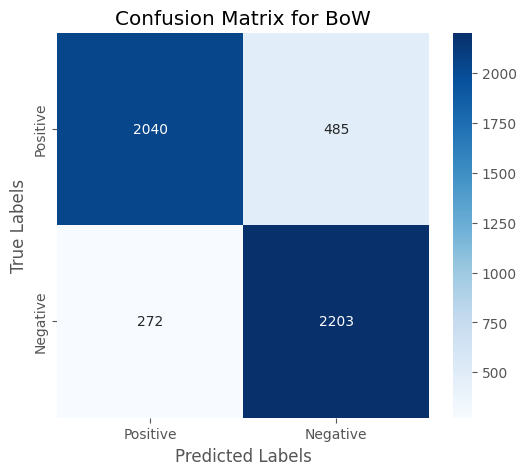

In [30]:
cm_bow = confusion_matrix(y_test_labelled, svm_bow_predict, labels=[1,0])
print(cm_bow)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_bow, annot=True, fmt="d", cmap="Blues",  xticklabels=["Positive", "Negative"], 
            yticklabels=["Positive", "Negative"])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for BoW')
plt.show()

[[4545  494]
 [ 673 4288]]


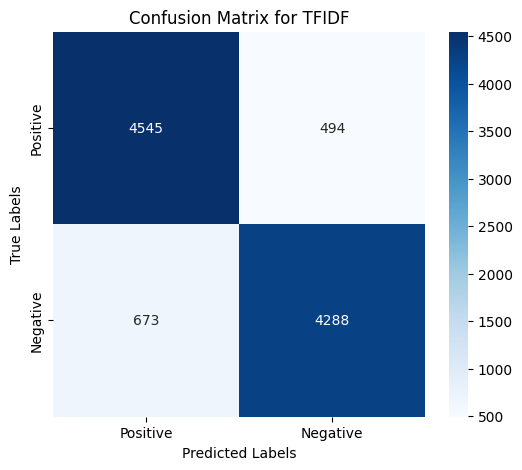

In [30]:
cm_tfidf_svm = confusion_matrix(y_test_labelled, svm_tfidf_predict, labels=[1,0])
print(cm_tfidf_svm)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_tfidf_svm, annot=True, fmt="d", cmap="Blues", xticklabels=["Positive", "Negative"], 
            yticklabels=["Positive", "Negative"])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for TFIDF')
plt.show()

## **Multinomial Naive Bayes Model**

In [31]:
# train the model
mnb = MultinomialNB()
# Fit mnb for bag of words
mnb_bow = mnb.fit(X_train_cv, y_train_labelled)
print(mnb_bow)
# Fit mnb for tfidf features
mnb_tfidf = mnb.fit(X_train_tv, y_train_labelled)
print(mnb_tfidf)

c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()


c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()


**MNB model performance on test data**

In [32]:
mnb_bow_predict = mnb.predict(X_test_cv)
print(mnb_bow_predict)

mnb_tfidf_predict = mnb.predict(X_test_tv)
print(mnb_tfidf_predict)

[1 1 1 ... 1 1 0]
[1 1 1 ... 1 1 1]


**Model Accuracy**

In [33]:
mnb_bow_score = accuracy_score(y_test_labelled, mnb_bow_predict)
print(f"mnb_bow_score: {mnb_bow_score}")
mnb_tfidf_score = accuracy_score(y_test_labelled, mnb_tfidf_predict)
print(f"mnb_tfidf_score: {mnb_tfidf_score}")

mnb_bow_score: 0.8632
mnb_tfidf_score: 0.8776


**Classification Report**

In [34]:
#Classification report for bag of words 
mnb_bow_report=classification_report(y_test_labelled,mnb_bow_predict,target_names=['Positive','Negative'])
print(mnb_bow_report)
#Classification report for tfidf features
mnb_tfidf_report=classification_report(y_test_labelled,mnb_tfidf_predict,target_names=['Positive','Negative'])
print(mnb_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.83      0.91      0.87      2475
    Negative       0.90      0.82      0.86      2525

    accuracy                           0.86      5000
   macro avg       0.87      0.86      0.86      5000
weighted avg       0.87      0.86      0.86      5000

              precision    recall  f1-score   support

    Positive       0.87      0.89      0.88      2475
    Negative       0.89      0.87      0.88      2525

    accuracy                           0.88      5000
   macro avg       0.88      0.88      0.88      5000
weighted avg       0.88      0.88      0.88      5000



**Confusion Matrix**

[[2070  455]
 [ 229 2246]]


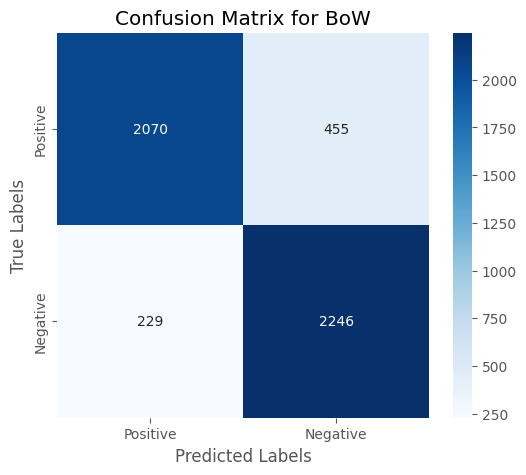

In [35]:
cm_bow = confusion_matrix(y_test_labelled, mnb_bow_predict, labels=[1,0])
print(cm_bow)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_bow, annot=True, fmt="d", cmap="Blues",  xticklabels=["Positive", "Negative"], 
            yticklabels=["Positive", "Negative"])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for BoW')
plt.show()

[[2189  336]
 [ 276 2199]]


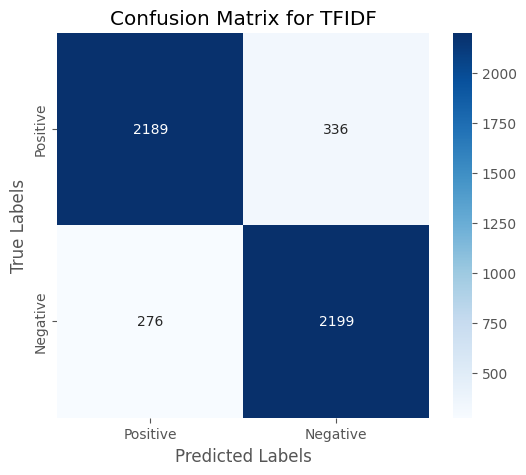

In [36]:
cm_tfidf_mnb = confusion_matrix(y_test_labelled, mnb_tfidf_predict, labels=[1,0])
print(cm_tfidf_mnb)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_tfidf_mnb, annot=True, fmt="d", cmap="Blues", xticklabels=["Positive", "Negative"], 
            yticklabels=["Positive", "Negative"])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for TFIDF')
plt.show()

Since the TFIDF vectorizer gave more accurate results, let us save it

In [28]:
%pip install joblib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
import joblib
joblib.dump(X_train_tv, 'X_train_tv.pkl')
joblib.dump(X_test_tv, 'X_test_tv.pkl')
joblib.dump(y_train_labelled, 'y_train_labelled.pkl')
joblib.dump(y_test_labelled, 'y_test_labelled.pkl')

['y_test_labelled.pkl']